In [1]:
from copy import deepcopy
import os
import pickle
import sys

from tqdm import tqdm
import numpy as np
import scipy.io as io
import pandas as pd
import geopy.distance # gps para distância
# from dtw import * # dynamic time warping

from dtwalign import dtw

import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\vinic\python_projects\monitoracao_project\dados_parquet'

ace_data = pd.read_parquet(path+r'\LRV4306_acc-001.parquet')
gps_data = pd.read_parquet(path+r'\LRV4306_gps.parquet')
gps_reference_in = pd.read_csv(path+r'\region5_inbound.csv', header=None)
gps_reference_out = pd.read_csv(path+r'\region5_outbound.csv', header=None)

In [3]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    return gps[res.get_warping_path(target="query")]
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def InterpoladorVelocidade(distancias, mult):
    # mult = len(distancias_nova)/len(distancias), len(distancias_nova)>len(distancias)
    n = len(distancias)-1
    distancias_nova = []
    for i in range(n):
        a = (distancias[i+1]-distancias[i])/mult
        for j in range(mult):
            distancias_nova.append(a*j)+distancias[i]
    
    return distancias_nova

In [4]:
datas = set(gps_data.loc[:,'date'])
n_passagens = set(gps_data.loc[:,'daily_passing'])
direcoes = set(gps_data.loc[:,'running_direction'])

In [5]:
p = list(datas)[0]
q = list(n_passagens)[0]
r = list(direcoes)[0]

In [6]:
p

20160128

In [7]:
valor_gps = gps_data.loc[(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1),:]
            valor_gps_corrigido = deepcopy(valor_gps)

IndentationError: unexpected indent (<ipython-input-7-ddecebea159b>, line 2)

In [8]:
valor_gps = gps_data.loc[(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1),:]
valor_gps_corrigido = deepcopy(valor_gps)

In [9]:
len(data.iloc[:,0])

NameError: name 'data' is not defined

In [10]:
len(datas.iloc[:,0])

AttributeError: 'set' object has no attribute 'iloc'

In [11]:
len(datas)

52

In [12]:
p

20160128

# fazer texto

In [13]:
p = len(data.iloc[:,0])
q = 1
r=1

NameError: name 'data' is not defined

In [14]:
p = 120140911
q = 1
r=1

In [15]:
            valor_gps = gps_data.loc[(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1),:]
            valor_gps_corrigido = deepcopy(valor_gps)

In [16]:
p = '120140911'
q = '1'
r='1'

In [17]:
valor_gps = gps_data.loc[(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1),:]
valor_gps_corrigido = deepcopy(valor_gps)

In [18]:
valor_gps = gps_data.loc[(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1),:]

In [19]:
type(gps_data.iloc[0,0])

numpy.float64

In [20]:
datas

{20131121,
 20131227,
 20140110,
 20140124,
 20140221,
 20140314,
 20140404,
 20140411,
 20140418,
 20140425,
 20140502,
 20140516,
 20140523,
 20140530,
 20140606,
 20140613,
 20140620,
 20140711,
 20140911,
 20140918,
 20141001,
 20141016,
 20141030,
 20141113,
 20141211,
 20141218,
 20150102,
 20150108,
 20150122,
 20150205,
 20150313,
 20150409,
 20150430,
 20150507,
 20150522,
 20150611,
 20150730,
 20150813,
 20150819,
 20151001,
 20151008,
 20151015,
 20151210,
 20160105,
 20160114,
 20160121,
 20160128,
 20160324,
 20160408,
 20160414,
 20160505,
 20160519}

In [21]:
direcoes

{1, 2}

In [22]:
n_passagens

{1, 2, 3, 4, 5, 6}

In [23]:
datas = set(gps_data.loc[:,'date'])
n_passagens = set(gps_data.loc[:,'daily_passing'])
direcoes = set(gps_data.loc[:,'running_direction'])

p = list(datas)[0]
q = list(n_passagens)[0]
r = list(direcoes)[0]

In [24]:
(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
146547    False
146548    False
146549    False
146550    False
146551    False
Length: 146552, dtype: bool

In [25]:
len(valor_gps.iloc[:,0])

0

In [26]:
valor_gps = gps_data.loc[(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1),:]
valor_gps_corrigido = deepcopy(valor_gps)

In [27]:
type(q)

int

In [28]:
type(p)

int

In [29]:
type(r)

int

In [30]:
len(valor_gps.iloc[:,0])

2

In [31]:
p = 20140911
q=1
r=1

In [32]:
gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1)

SyntaxError: unmatched ')' (<ipython-input-32-265e0842c675>, line 1)

In [33]:
(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1)

0          True
1          True
2          True
3          True
4          True
          ...  
146547    False
146548    False
146549    False
146550    False
146551    False
Length: 146552, dtype: bool

In [34]:
valor_gps = gps_data.loc[(gps_data.loc[:,['date', 'daily_passing', 'running_direction']]==[p, q, r]).all(axis=1),:]

In [35]:
valor_gps_corrigido = deepcopy(valor_gps)

In [36]:
if len(valor_gps.iloc[:,0])>0:
    if r == 1:
        valor_gps_corrigido.iloc[:,0] = \
            DynamicTimeWarping(gps_reference_out.iloc[:, 2], valor_gps.iloc[:, 0])

        valor_gps_corrigido.iloc[:,1] = \
            DynamicTimeWarping(gps_reference_out.iloc[:, 1], valor_gps.iloc[:, 1])

    else:
        valor_gps_corrigido.iloc[:,0] = \
            DynamicTimeWarping(gps_reference_in.iloc[:, 2], valor_gps.iloc[:, 0])

        valor_gps_corrigido.iloc[:,1] = \
            DynamicTimeWarping(gps_reference_in.iloc[:, 1], valor_gps.iloc[:, 1])


c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]


ValueError: Must have equal len keys and value when setting with an iterable

In [37]:
gps_reference_out.iloc[:, 2]

0       -80.002873
1       -80.002872
2       -80.002871
3       -80.002870
4       -80.002869
           ...    
18599   -80.019983
18600   -80.019987
18601   -80.019990
18602   -80.019993
18603   -80.019997
Name: 2, Length: 18604, dtype: float64

In [38]:
valor_gps.iloc[:, 0]

0     -80.002785
1     -80.002730
2     -80.002668
3     -80.002613
4     -80.002550
         ...    
435   -80.019372
436   -80.019513
437   -80.019647
438   -80.019783
439   -80.019933
Name: gps_0, Length: 440, dtype: float64

In [39]:
valor_gps_corrigido.iloc[:,0] = \
                    DynamicTimeWarping(gps_reference_out.iloc[:, 2], valor_gps.iloc[:, 0], True)
    

TypeError: DynamicTimeWarping() takes 2 positional arguments but 3 were given

In [40]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def InterpoladorVelocidade(distancias, mult):
    # mult = len(distancias_nova)/len(distancias), len(distancias_nova)>len(distancias)
    n = len(distancias)-1
    distancias_nova = []
    for i in range(n):
        a = (distancias[i+1]-distancias[i])/mult
        for j in range(mult):
            distancias_nova.append(a*j)+distancias[i]
    
    return distancias_nova

c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]


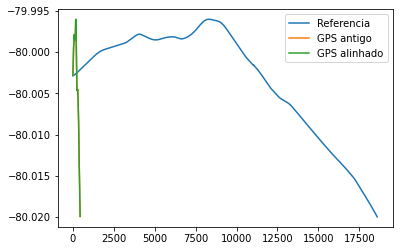

ValueError: Must have equal len keys and value when setting with an iterable

In [41]:
valor_gps_corrigido.iloc[:,0] = \
                    DynamicTimeWarping(gps_reference_out.iloc[:, 2], valor_gps.iloc[:, 0], True)
    

In [42]:
x = np.array([0 2 3 4 2])
y = np.array([2 3 2 4 5]) 

teste = DynamicTimeWarping(x, y)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-42-40ed362b7d0e>, line 3)

In [43]:
x = np.array([0, 2, 3, 4, 2])
y = np.array([2, 3, 2 ,4, 5]) 

teste = DynamicTimeWarping(x, y)

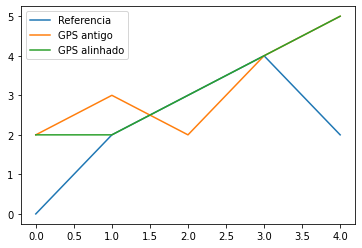

In [44]:
x = np.array([0, 2, 3, 4, 2])
y = np.array([2, 3, 2 ,4, 5]) 

teste = DynamicTimeWarping(x, y, True)

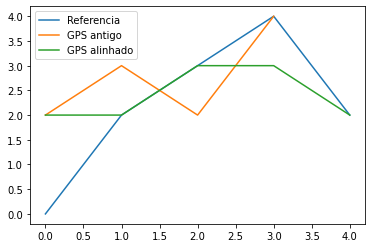

In [45]:
x = np.array([0, 2, 3, 4, 2])
y = np.array([2, 3, 2 ,4]) 

teste = DynamicTimeWarping(x, y, True)

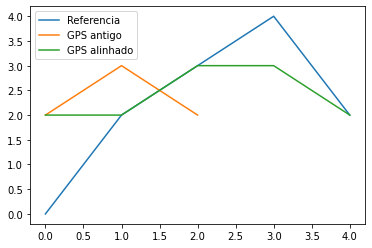

In [46]:
x = np.array([0, 2, 3, 4, 2])
y = np.array([2, 3, 2]) 

teste = DynamicTimeWarping(x, y, True)

In [47]:
gps_reference_out.iloc[:, 2]

0       -80.002873
1       -80.002872
2       -80.002871
3       -80.002870
4       -80.002869
           ...    
18599   -80.019983
18600   -80.019987
18601   -80.019990
18602   -80.019993
18603   -80.019997
Name: 2, Length: 18604, dtype: float64

In [48]:
valor_gps.iloc[:, 0]

0     -80.002785
1     -80.002730
2     -80.002668
3     -80.002613
4     -80.002550
         ...    
435   -80.019372
436   -80.019513
437   -80.019647
438   -80.019783
439   -80.019933
Name: gps_0, Length: 440, dtype: float64

c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]


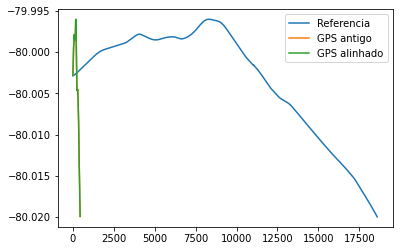

In [49]:
#x = np.array([0, 2, 3, 4, 2])
#y = np.array([2, 3, 2]) 

x = gps_reference_out.iloc[:, 2]
y = valor_gps.iloc[:, 0]

teste = DynamicTimeWarping(x, y, True)

In [50]:
round(1.1)

1

In [51]:
round(len(x)/len(valor_gps.iloc[:, 0]))

42

In [52]:
x = gps_reference_out.iloc[:, 2]
y = InterpoladorVelocidade(valor_gps.iloc[:, 0], round(len(x)/len(valor_gps.iloc[:, 0])))


TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

In [53]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, mult):
    # mult = len(distancias_nova)/len(distancias), len(distancias_nova)>len(distancias)
    n = len(distancias)-1
    distancias_nova = []
    for i in range(n):
        a = (distancias[i+1]-distancias[i])/mult
        for j in range(mult):
            distancias_nova.append(a*j)+distancias[i]
    
    return distancias_nova

In [54]:
x

0       -80.002873
1       -80.002872
2       -80.002871
3       -80.002870
4       -80.002869
           ...    
18599   -80.019983
18600   -80.019987
18601   -80.019990
18602   -80.019993
18603   -80.019997
Name: 2, Length: 18604, dtype: float64

In [55]:
x = np.array([0, 2, 3, 4, 2])

In [56]:
x = np.array([0, 2, 3, 4, 2])

In [57]:
teste_inter = Interpolador(x, 2)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [58]:
x

array([0, 2, 3, 4, 2])

In [59]:
distancia = x

In [60]:
mult=2

In [61]:
a = (distancias[i+1]-distancias[i])/mult

NameError: name 'distancias' is not defined

In [62]:
distancias = x

In [63]:
a = (distancias[i+1]-distancias[i])/mult

NameError: name 'i' is not defined

In [64]:
i=0

In [65]:
a = (distancias[i+1]-distancias[i])/mult

In [66]:
a

1.0

In [67]:
x

array([0, 2, 3, 4, 2])

In [68]:
    n = len(distancias)-1
    distancias_nova = []

In [69]:
n

4

In [70]:
    for i in range(n):
        a = (distancias[i+1]-distancias[i])/mult
        for j in range(mult):
            distancias_nova.append(a*j)+distancias[i]

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [71]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, mult):
    # mult = len(distancias_nova)/len(distancias), len(distancias_nova)>len(distancias)
    n = len(distancias)-1
    distancias_nova = []
    for i in range(n):
        a = (distancias[i+1]-distancias[i])/mult
        for j in range(mult):
            distancias_nova.append(a*j+distancias[i])
    
    return distancias_nova

In [72]:
#x = np.array([0, 2, 3, 4, 2])
#teste_inter = Interpolador(x, 2)
#y = np.array([2, 3, 2]) 

x = gps_reference_out.iloc[:, 2]
y = Interpolador(valor_gps.iloc[:, 0], round(len(x)/len(valor_gps.iloc[:, 0])))


teste = DynamicTimeWarping(x, y, True)

AttributeError: 'list' object has no attribute 'shape'

In [73]:
 x = gps_reference_out.iloc[:, 2]
y = Interpolador(valor_gps.iloc[:, 0], round(len(x)/len(valor_gps.iloc[:, 0])))

In [74]:
y

[-80.002785,
 -80.00278369047619,
 -80.00278238095238,
 -80.00278107142857,
 -80.00277976190476,
 -80.00277845238095,
 -80.00277714285714,
 -80.00277583333333,
 -80.00277452380952,
 -80.00277321428571,
 -80.0027719047619,
 -80.0027705952381,
 -80.0027692857143,
 -80.00276797619048,
 -80.00276666666667,
 -80.00276535714286,
 -80.00276404761905,
 -80.00276273809524,
 -80.00276142857143,
 -80.00276011904762,
 -80.00275880952381,
 -80.0027575,
 -80.00275619047619,
 -80.00275488095238,
 -80.00275357142857,
 -80.00275226190476,
 -80.00275095238095,
 -80.00274964285714,
 -80.00274833333333,
 -80.00274702380952,
 -80.00274571428571,
 -80.0027444047619,
 -80.0027430952381,
 -80.00274178571429,
 -80.00274047619048,
 -80.00273916666667,
 -80.00273785714286,
 -80.00273654761905,
 -80.00273523809524,
 -80.00273392857143,
 -80.00273261904762,
 -80.00273130952381,
 -80.00273,
 -80.00272853095238,
 -80.00272706190476,
 -80.00272559285715,
 -80.00272412380953,
 -80.00272265476191,
 -80.00272118571428,


In [75]:
x = np.array([0, 2, 3, 4, 2])

In [76]:
teste_inter = Interpolador(x, 2)

In [77]:
teste_inter


[0.0, 1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 3.0]

In [78]:
Interpolador(x, 3)

[0.0,
 0.6666666666666666,
 1.3333333333333333,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0,
 3.3333333333333335,
 3.6666666666666665,
 4.0,
 3.3333333333333335,
 2.666666666666667]

In [79]:
int(1.1)

1

In [80]:
int(1.6)

1

In [81]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, n_final):
    # n_final = tamanho final do vetor
    # mult = número a ser adicionado em cada intervalo
    # caso não tenha o número entre intervalos, só o número a ser alcançado no final
    n_inicial = len(distancias)
    mult = int(round((n_final-n_inicial)/(n_inicial-1)))
    distancias_nova = []
    for i in range(n_inicial-1):
        a = (distancias[i+1]-distancias[i])/mult
        for j in range(mult):
            distancias_nova.append(a*j+distancias[i])
    
    return distancias_nova

In [82]:
x = np.array([0, 2, 3, 4, 2])

In [83]:
teste_inter = Interpolador(x, 3)

<ipython-input-81-fdd56af3f96a>:60: RuntimeWarning: divide by zero encountered in long_scalars
  a = (distancias[i+1]-distancias[i])/mult


In [84]:
teste_inter = Interpolador(x, 10)

In [85]:
teste_inter

[0.0, 2.0, 3.0, 4.0]

In [86]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, n_final):
    # n_final = tamanho final do vetor
    # mult = número a ser adicionado em cada intervalo
    # caso não tenha o número entre intervalos, só o número a ser alcançado no final
    n_inicial = len(distancias)
    mult = int(round((n_final-n_inicial)/(n_inicial-1)))+1
    distancias_nova = []
    for i in range(n_inicial-1):
        a = (distancias[i+1]-distancias[i])/(mult)
        for j in range(mult):
            distancias_nova.append(a*j+distancias[i])
    
    return distancias_nova

In [87]:
teste_inter = Interpolador(x, 10)

In [88]:
teste_inter

[0.0, 1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 3.0]

In [89]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, n_final):
    # n_final = tamanho final do vetor
    # mult = número a ser adicionado em cada intervalo
    # caso não tenha o número entre intervalos, só o número a ser alcançado no final
    n_inicial = len(distancias)
    mult = int(round((n_final-n_inicial)/(n_inicial-1)))+1
    distancias_nova = []
    for i in range(n_inicial-1):
        a = (distancias[i+1]-distancias[i])/(mult)
        for j in range(mult):
            distancias_nova.append(a*j+distancias[i])
    
    distancias_nova.append(distancias[-1])
    
    return distancias_nova

In [90]:
Interpolador(x, 10)

[0.0, 1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 3.0, 2]

In [91]:
x

array([0, 2, 3, 4, 2])

In [92]:
x = gps_reference_out.iloc[:, 2]
y = Interpolador(valor_gps.iloc[:, 0], round(len(x)/len(valor_gps.iloc[:, 0])))


<ipython-input-89-3af954a607b7>:60: RuntimeWarning: divide by zero encountered in double_scalars
  a = (distancias[i+1]-distancias[i])/(mult)
<ipython-input-89-3af954a607b7>:60: RuntimeWarning: invalid value encountered in double_scalars
  a = (distancias[i+1]-distancias[i])/(mult)


KeyError: -1

In [93]:
x = gps_reference_out.iloc[:, 2]
y = Interpolador(list(valor_gps.iloc[:, 0]), len(list(x)))


In [94]:
len(x)

18604

In [95]:
len(y)

18439

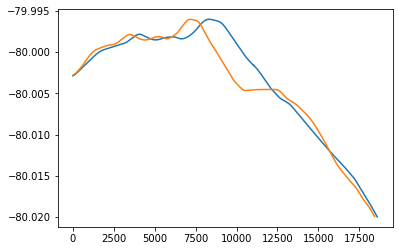

In [96]:
plt.plot(x)
plt.plot(y)
plt.show()

In [97]:
y = Interpolador(valor_gps.iloc[:, 0], len(x))

KeyError: -1

In [98]:
y = Interpolador(list(valor_gps.iloc[:, 0]), len(list(x)))

In [99]:
teste = DynamicTimeWarping(x, y, True)

AttributeError: 'list' object has no attribute 'shape'

In [100]:
x = gps_reference_out.iloc[:, 2]
y = np.asarray(Interpolador(list(valor_gps.iloc[:, 0]), len(list(x))))



c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]


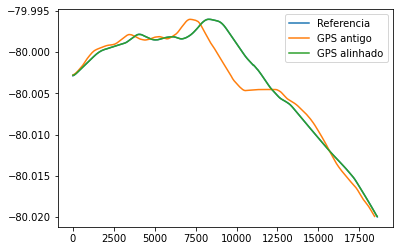

In [101]:
teste = DynamicTimeWarping(x, y, True)

In [102]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, n_final):
    # n_final = tamanho final do vetor
    # mult = número a ser adicionado em cada intervalo
    # caso não tenha o número entre intervalos, só o número a ser alcançado no final
    n_inicial = len(distancias)
    mult = int(round((n_final-n_inicial)/(n_inicial-1)))+1
    distancias_nova = []
    for i in tqdm(range(n_inicial-1)):
        a = (distancias[i+1]-distancias[i])/(mult)
        for j in range(mult):
            distancias_nova.append(a*j+distancias[i])
    
    distancias_nova.append(distancias[-1])
    
    return distancias_nova

In [103]:
x = gps_reference_out.iloc[:, 2]
y = np.asarray(Interpolador(list(valor_gps.iloc[:, 0]), len(list(x))))

100%|██████████| 439/439 [00:00<00:00, 219463.58it/s]


In [104]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = tqdm(gps[res.get_warping_path(target="query")])

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, n_final):
    # n_final = tamanho final do vetor
    # mult = número a ser adicionado em cada intervalo
    # caso não tenha o número entre intervalos, só o número a ser alcançado no final
    n_inicial = len(distancias)
    mult = int(round((n_final-n_inicial)/(n_inicial-1)))+1
    distancias_nova = []
    for i in tqdm(range(n_inicial-1)):
        a = (distancias[i+1]-distancias[i])/(mult)
        for j in range(mult):
            distancias_nova.append(a*j+distancias[i])
    
    distancias_nova.append(distancias[-1])
    
    return distancias_nova

c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]
  0%|          | 0/18604 [00:00<?, ?it/s]


TypeError: float() argument must be a string or a real number, not 'tqdm'

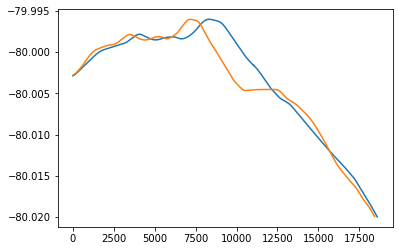

In [105]:
teste = DynamicTimeWarping(x, y, True)

In [106]:
# Dynamic time warping

def DynamicTimeWarping(referencia, gps, plot=False):
    #retorna os vetores alinhados
    # https://dtwalign.readthedocs.io/en/latest/tutorial.html

    res = dtw(gps, referencia)
    gps_novo = gps[res.get_warping_path(target="query")]

    if plot:
        plt.plot(referencia, label='Referencia')
        plt.plot(gps, label='GPS antigo')
        plt.plot(gps_novo, label = 'GPS alinhado')
        plt.legend()
        plt.show()

    return gps_novo
    


# Transformando coordenadas em distância

def Distancias(data, n_passagens, direcao, gps_data):
    # retorna o vetor de distâncias dada determinada data, número de passagens e etc

    #data = '20130102' # definir as datas dps
    coordenadas = (gps_data.loc['Data', 'N Passagens', 'Direcao']==\
        (data, n_passagens, direcao)).iloc[:, [0, 1]] # matriz(n,2) com os valores de coordenadas de determinado dataset

    n = len(coordenadas.iloc[:,0])
    dists = np.zeros(n-1,1)
    for i in range(len(coordenadas)-1):
        coords_1 = (coordenadas[i, 0], coordenadas[i, 1])
        coords_2 = (coordenadas[i+1, 0], coordenadas[i+1, 1])
        dists[i] = geopy.distance.geodesic(coords_1, coords_2).km

    return dists



# Velocidade

def Velocidade(distancias, tempos):
    velocidades = distancias/tempos
    return velocidades



# Fazendo o upsampling
def Interpolador(distancias, n_final):
    # n_final = tamanho final do vetor
    # mult = número a ser adicionado em cada intervalo
    # caso não tenha o número entre intervalos, só o número a ser alcançado no final
    n_inicial = len(distancias)
    mult = int(round((n_final-n_inicial)/(n_inicial-1)))+1
    distancias_nova = []
    for i in tqdm(range(n_inicial-1)):
        a = (distancias[i+1]-distancias[i])/(mult)
        for j in range(mult):
            distancias_nova.append(a*j+distancias[i])
    
    distancias_nova.append(distancias[-1])
    
    return distancias_nova

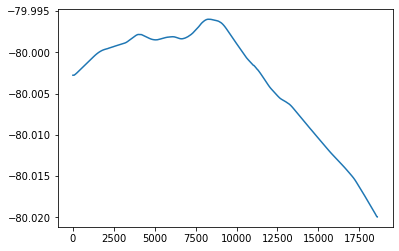

In [107]:
plt.plot(teste)
plt.show()

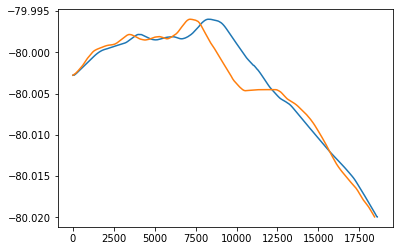

In [108]:
plt.plot(teste)
plt.plot(y)
plt.show()

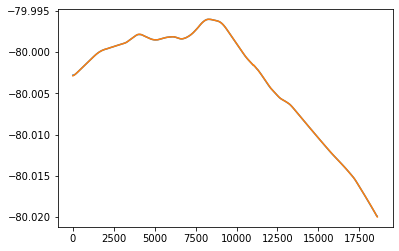

In [109]:
plt.plot(teste)
plt.plot(x)
plt.show()

100%|██████████| 439/439 [00:00<00:00, 219280.63it/s]
c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]


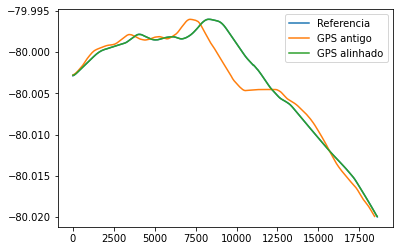

In [110]:
x = gps_reference_out.iloc[:, 2]
y = np.asarray(Interpolador(list(valor_gps.iloc[:, 0]), len(list(x))))
z = DynamicTimeWarping(x, y, True)

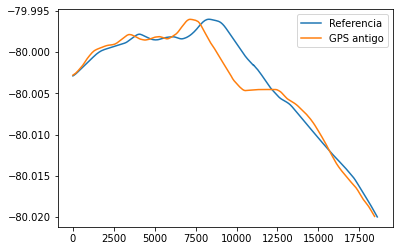

In [111]:
plt.plot(x, label='Referencia')
plt.plot(y, label='GPS antigo')
plt.legend()
plt.show()